# Treinamento


In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
n_features = 10
n_dense_neurons = 3
# O segundo parâmetro de placeholder é o formato, Onde tem o None,
# são os registros, ou seja, as linhas e n_features são as colunas.
x = tf.placeholder(tf.float32, (None, n_features))
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))
b = tf.Variable(tf.ones([n_dense_neurons]))
xW = tf.matmul(x, W)
z = tf.add(xW, b)
#função de ativação
a = tf.sigmoid(z)
init = tf.global_variables_initializer()
with tf.Session() as sess:
  sess.run(init)
  layer_out = sess.run(a, feed_dict={x: np.random.random([1, n_features])})
#Resultado, números entre 0 e 1, porque estamos usando a função de ativação Sigmoid
print(layer_out)

[[0.7682511  0.9767883  0.68143857]]


# Modelo

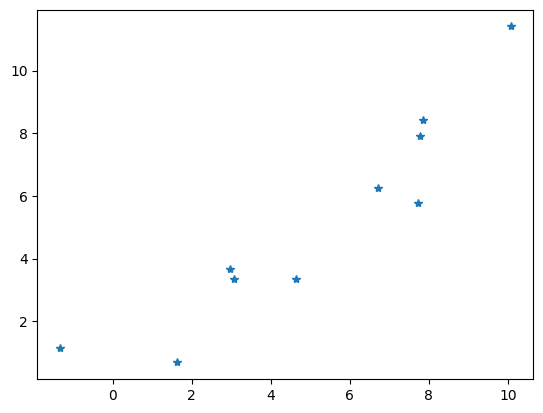

In [3]:
x_data = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
y_label = np.linspace(0, 10, 10) + np.random.uniform(-1.5, 1.5, 10)
import matplotlib .pyplot as plt
%matplotlib inline
plt.plot(x_data, y_label, '*')

In [4]:
m = tf.Variable(0.35)
b = tf.Variable(0.19)

error = 0
for x, y in zip(x_data, y_label):
  y_hat = m * x + b
  error += (y - y_hat) ** 2

In [5]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()

In [6]:
with tf.Session() as sess:
  sess.run(init)
  training_steps = 1
  for i in range(training_steps):
    sess.run(train)
  final_slope, final_intercept = sess.run([m, b])

x_test = np.linspace(-1, 11, 10)
# y = mx + b
y_pred_plot = final_slope * x_test + final_intercept

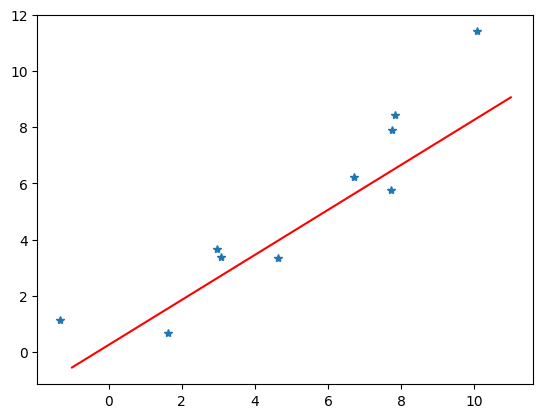

In [7]:

plt.plot(x_test, y_pred_plot, 'red')
plt.plot(x_data, y_label, '*')